# Fuzzy Clustering - Fuzzy C Means Algorithm

Motivation for the fuzzy memberships examples: point mid-way between clusters, overlapping clusters

So, we want soft clustering (as opposed to the hard/crisp clustering given by sequential or k-means).  We can do that by defining an objective function with membership values.

The FCM objective function is:
\begin{equation}
J = \sum_{i= 1}^{N} \sum_{j = 1}^{M} u_{ij}^m d(\mathbf{x}_i, C_j) \quad \text{s.t. } 0 \le u_{ij} \le 1; \sum_{j = 1}^M u_{ij} = 1 \nonumber
\end{equation}

  Suppose $d(\mathbf{x}_i, C_j) = \left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2$
   where $\mathbf{\theta}_j$ 
  is the mean for cluster $j$, how would you minimize this objective? 
How do you incorporate the constraints on the membership values?



Solve for the update equation for the cluster representatives:
\begin{eqnarray}
J &=& \sum_{i= 1}^{N} \sum_{j = 1}^{M} u_{ij}^m \left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2\\
\frac{\partial J}{\partial \theta_j} &=& \sum_{i= 1}^{N} -2u_{ij}^m\left(\mathbf{x}_i - \theta_j\right) \\
0 &=& \sum_{i= 1}^{N} \left(-2u_{ij}^m\mathbf{x}_i + 2u_{ij}^m\theta_j \right)\\
& &\sum_{i= 1}^{N} u_{ij}^m\mathbf{x}_i = \theta_j\sum_{i= 1}^{N} u_{ij}^m \\
\theta_j &=& \frac{\sum_{i= 1}^{N} u_{ij}^m\mathbf{x}_i}{\sum_{i= 1}^{N} u_{ij}^m}
\end{eqnarray}

Solve for the update equation for the membership values:
\begin{eqnarray}
L &=& \sum_{i= 1}^{N} \sum_{j = 1}^{M} u_{ij}^m \left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2 - \sum_{i= 1}^{N} \lambda_i \left( \sum_{j=1}^M u_{ij} - 1\right) \\
\frac{\partial J}{\partial u_{ij}} &=& mu_{ij}^{(m-1)} \left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2 - \lambda_i = 0\\
u_{ij}  &=& \left(\frac{\lambda_i}{m\left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2} \right)^{\frac{1}{(m-1)}}\\
& & \sum_{j=1}^M u_{ij} = 1\\
1 &=& \sum_{j=1}^M \left(\frac{\lambda_i^{\frac{1}{(m-1)}}}{\left(m\left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2\right)^{\frac{1}{(m-1)}}} \right)\\
1 &=& \lambda_i^{\frac{1}{(m-1)}} \sum_{j=1}^M \left(\frac{1}{\left(m\left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2\right)^{\frac{1}{(m-1)}}} \right)\\
\lambda_i^{\frac{1}{(m-1)}} &=& \left( \sum_{k=1}^M \left(\frac{1}{\left(m\left\| \mathbf{x}_i - \mathbf{\theta}_k \right\|_2^2\right)^{\frac{1}{(m-1)}}} \right)\right)^{-1}\\
u_{ij}  &=& \left( \sum_{k=1}^M \left(\frac{1}{\left(m\left\| \mathbf{x}_i - \mathbf{\theta}_k \right\|_2^2\right)^{\frac{1}{(m-1)}}} \right)\right)^{-1} \left(\frac{1}{m\left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2} \right)^{\frac{1}{(m-1)}}\\
u_{ij}  &=& \frac{1}{\sum_{k=1}^M{\frac{1}{\left(m\left\| \mathbf{x}_i - \mathbf{\theta}_k \right\|_2^2\right)^{\frac{1}{(m-1)}}}}} \left(\frac{1}{m\left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2} \right)^{\frac{1}{(m-1)}}\\
u_{ij}  &=& \frac{1}{\sum_{k=1}^M{\left(\frac{\left\| \mathbf{x}_i - \mathbf{\theta}_j \right\|_2^2}{\left\| \mathbf{x}_i - \mathbf{\theta}_k \right\|_2^2}\right)^{\frac{1}{m-1}}}}  
\end{eqnarray}



Fuzzy C-Means Algorithm

- Set number of clusters, M, and m
- Initialize cluster centers

- LOOP UNTIL{ Change in cluster centers is small}
- FOR{i = 1 to N}
    - FOR{j = 1 to M}
        - IF{$d(\mathbf{x}_i, C_j) \ne 0$}
            $u_{ij} \gets \frac{1}{\sum_{k=1}^M \left(\frac{d(\mathbf{x}_i, C_j)}{d(\mathbf{x}_i, C_k)}\right)^{\frac{1}{q}}}$
        - ELSE
            $u_{ij} = 1$
        - ENDIF
    - ENDFOR
- ENDFOR
- FOR{j = 1 to M}
    - Update cluster representatives
- ENDFOR


 After going over code, answer the following questions:

- What constraints are there on the value of the fuzzifier $m$? Why?
- How do results change as $m$ approaches 1? 2? 3? How do results changes with changes in $m$? Can $m$ get too big? too small? 
- Does FCM find the globally optimal solution? Why or why not? What sort of optimization strategy is being used in the FCM algorithm?
- What FCM membership values would a point that is located exactly halfway between two cluster centers (when clustering into two clusters) obtain? 
- What FCM membership values would an outlier data point recieve?  An outlier data point would be one that is far from any cluster representative. 
- What may be some benefits of FCM over K-Means? 
- What may be some negatives of FCM from K-Means?


In [1]:
"""
cmeans.py : Fuzzy C-means clustering algorithm.
Code from: https://github.com/scikit-fuzzy/scikit-fuzzy/blob/master/skfuzzy/cluster/_cmeans.py
"""
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn import datasets 
%matplotlib inline 


def _cmeans0(data, u_old, c, m):
    """
    Single step in generic fuzzy c-means clustering algorithm.
    Modified from Ross, Fuzzy Logic w/Engineering Applications (2010),
    pages 352-353, equations 10.28 - 10.35.
    Parameters inherited from cmeans()
    """
    # Normalizing, then eliminating any potential zero values.
    u_old /= np.ones((c, 1)).dot(np.atleast_2d(u_old.sum(axis=0))) # axis=0: feature space, sum for each column; number of points
    u_old = np.fmax(u_old, np.finfo(np.float64).eps)

    um = u_old ** m 

    # Calculate cluster centers
    data = data.T # data: data points * number of features/dimensions; axis=1: sum for each row
    cntr = um.dot(data) / (np.ones((data.shape[1],
                                    1)).dot(np.atleast_2d(um.sum(axis=1))).T) # um: number of clusters * data points

    d = _distance(data, cntr)
    d = np.fmax(d, np.finfo(np.float64).eps) # Distance rather than distance ** 2

    jm = (um * d ** 2).sum() # Objective function

    u = d ** (- 2. / (m - 1))
    u /= np.ones((c, 1)).dot(np.atleast_2d(u.sum(axis=0)))

    return cntr, u, jm, d

In [2]:
def _distance(data, centers):
    """
    Euclidean distance from each point to each cluster center.
    Parameters
    ----------
    data : 2d array (N x Q)
        Data to be analyzed. There are N data points.
    centers : 2d array (C x Q)
        Cluster centers. There are C clusters, with Q features.
    Returns
    -------
    dist : 2d array (C x N)
        Euclidean distance from each point, to each cluster center.
    See Also
    --------
    scipy.spatial.distance.cdist
    """
    return cdist(data, centers).T

In [3]:
def _fp_coeff(u):
    """
    Fuzzy partition coefficient `fpc` relative to fuzzy c-partitioned
    matrix `u`. Measures 'fuzziness' in partitioned clustering.
    Parameters
    ----------
    u : 2d array (C, N)
        Fuzzy c-partitioned matrix; N = number of data points and C = number
        of clusters.
    Returns
    -------
    fpc : float
        Fuzzy partition coefficient.
    """
    n = u.shape[1] # number of data points

    return np.trace(u.dot(u.T)) / float(n) # cluster * cluster



In [4]:
def cmeans(data, c, m=2, error=1e-3, maxiter=300, init=None, seed=None):
    """
    Fuzzy c-means clustering algorithm [1].
    Parameters
    ----------
    data : 2d array, size (S, N)
        Data to be clustered.  N is the number of data sets; S is the number
        of features within each sample vector.
    c : int
        Desired number of clusters or classes.
    m : float
        Array exponentiation applied to the membership function u_old at each
        iteration, where U_new = u_old ** m.
    error : float
        Stopping criterion; stop early if the norm of (u[p] - u[p-1]) < error.
    maxiter : int
        Maximum number of iterations allowed.
    init : 2d array, size (S, N)
        Initial fuzzy c-partitioned matrix. If none provided, algorithm is
        randomly initialized.
    seed : int
        If provided, sets random seed of init. No effect if init is
        provided. Mainly for debug/testing purposes.
    Returns
    -------
    cntr : 2d array, size (S, c)
        Cluster centers.  Data for each center along each feature provided
        for every cluster (of the `c` requested clusters).
    u : 2d array, (S, N)
        Final fuzzy c-partitioned matrix.
    u0 : 2d array, (S, N)
        Initial guess at fuzzy c-partitioned matrix (either provided init or
        random guess used if init was not provided).
    d : 2d array, (S, N)
        Final Euclidian distance matrix.
    jm : 1d array, length P
        Objective function history.
    p : int
        Number of iterations run.
    fpc : float
        Final fuzzy partition coefficient.
    Notes
    -----
    The algorithm implemented is from Ross et al. [1]_.
    Fuzzy C-Means has a known problem with high dimensionality datasets, where
    the majority of cluster centers are pulled into the overall center of
    gravity. If you are clustering data with very high dimensionality and
    encounter this issue, another clustering method may be required. For more
    information and the theory behind this, see Winkler et al. [2]_.
    References
    ----------
    .. [1] Ross, Timothy J. Fuzzy Logic With Engineering Applications, 3rd ed.
           Wiley. 2010. ISBN 978-0-470-74376-8 pp 352-353, eq 10.28 - 10.35.
    .. [2] Winkler, R., Klawonn, F., & Kruse, R. Fuzzy c-means in high
           dimensional spaces. 2012. Contemporary Theory and Pragmatic
           Approaches in Fuzzy Computing Utilization, 1.
    """
    # Setup u0
    if init is None:
        if seed is not None:
            np.random.seed(seed=seed)
        n = data.shape[1]  # number of data points
        u0 = np.random.rand(c, n) # cluster * data points
        u0 /= np.ones(
            (c, 1)).dot(np.atleast_2d(u0.sum(axis=0))).astype(np.float64) # normalizing
        init = u0.copy()
    u0 = init
    u = np.fmax(u0, np.finfo(np.float64).eps)

    # Initialize loop parameters
    jm = np.zeros(0) # []
    p = 0

    # Main cmeans loop
    while p < maxiter - 1:
        u2 = u.copy()
        [cntr, u, Jjm, d] = _cmeans0(data, u2, c, m)
        jm = np.hstack((jm, Jjm)) # save objective function
        p += 1

        # Stopping rule
        if np.linalg.norm(u - u2) < error: # difference between two consective membership values
            break

    # Final calculations
    error = np.linalg.norm(u - u2) 
    fpc = _fp_coeff(u)  # fuzzy partition correlation (cluster * cluster)

    return cntr, u  # center values and membership of all data points

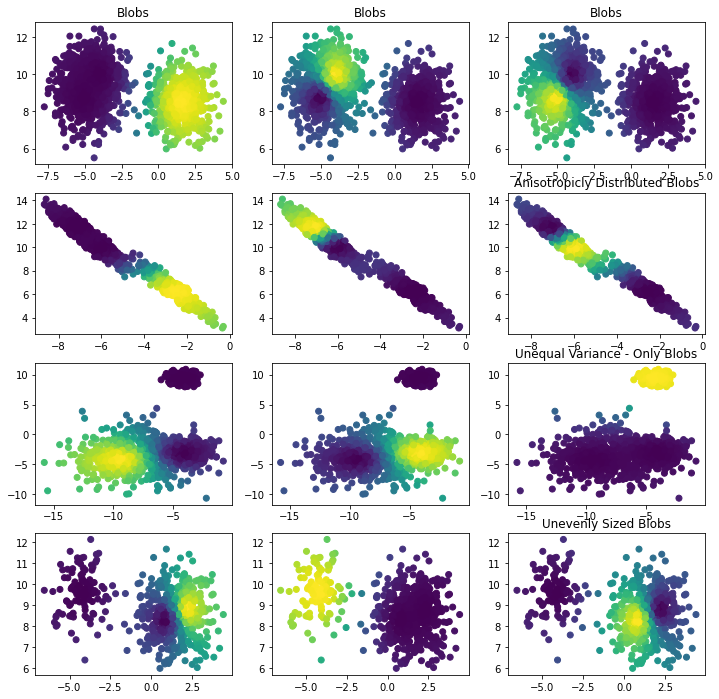

In [5]:
if __name__ == '__main__':
    plt.figure(figsize=(12, 12))

    n_samples = 1500
    noisy_circles, y_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                          noise=.05)
    noisy_moons, y_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
    blobs, y_blobs = datasets.make_blobs(n_samples=n_samples)

    # Incorrect number of clusters
    X = blobs
    y = y_blobs
    n_clusters = 3
    m = 2
    centers, L = cmeans(X.T, n_clusters, m) # centers: cluster * feature/dimension; L: cluster * data points
    plt.subplot(431)
    plt.scatter(X[:, 0], X[:, 1], c=L[0,:]) # membership belonging to the first cluster
    plt.title("Blobs")
    plt.subplot(432)
    plt.scatter(X[:, 0], X[:, 1], c=L[1,:]) # membership belonging to the second cluster
    plt.title("Blobs")
    plt.subplot(433)
    plt.scatter(X[:, 0], X[:, 1], c=L[2,:]) # membership belonging to the third cluster
    plt.title("Blobs")

    # Anisotropicly distributed data
    transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    X_aniso = np.dot(X, transformation)
    centers, L = cmeans(X_aniso.T, n_clusters,m)
    plt.subplot(434)
    plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=L[0,:])
    plt.subplot(435)
    plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=L[1,:])
    plt.subplot(436)
    plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=L[2,:])
    plt.title("Anisotropicly Distributed Blobs")


    # Different variance
    X_varied, y_varied = datasets.make_blobs(n_samples=n_samples,
                                    cluster_std=[1.0, 2.5, 0.5])
    centers, L = cmeans(X_varied.T, n_clusters,m)
    plt.subplot(437)
    plt.scatter(X_varied[:, 0], X_varied[:, 1], c=L[0,:])
    plt.subplot(438)
    plt.scatter(X_varied[:, 0], X_varied[:, 1], c=L[1,:])
    plt.subplot(439)
    plt.scatter(X_varied[:, 0], X_varied[:, 1], c=L[2,:])
    plt.title("Unequal Variance - Only Blobs")

    # Unevenly sized blobs
    X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
    centers, L = cmeans(X_filtered.T, n_clusters,m)
    plt.subplot(4,3,10)
    plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=L[0,:])
    plt.subplot(4,3,11)
    plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=L[1,:])
    plt.subplot(4,3,12)
    plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=L[2,:])
    plt.title("Unevenly Sized Blobs")

    plt.show()

In [6]:
blobs.shape

(1500, 2)